In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def solve_mass_spring_damper(t_max, dt, position_ic, velocity_ic, external_force):
    """
    Solves the mass-spring-damper system with a given external force and initial conditions.

    Parameters:
    - t_max: Maximum time for the solution.
    - dt: Time step for iteration.
    - initial_conditions: A tuple (x0, v0) of initial displacement and velocity.
    - external_force: A constant force applied to the system.

    Returns:
    - A plot of the system's response over time.
    """

    # Time array
    t_values = np.arange(0, t_max, dt)
    
    # Arrays to store solutions
    x_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)
    
    # Set initial conditions
    x_values[0] = position_ic
    v_values[0] = velocity_ic
    
    # Iterative solution using Euler's method
    for i in range(1, len(t_values)):
        # Second derivative (acceleration)
        a = external_force - v_values[i-1] - 2 * x_values[i-1]
        
        # Update velocity
        v_values[i] = v_values[i-1] + a * dt
        
        # Update position
        x_values[i] = x_values[i-1] + v_values[i] * dt
    
    df = pd.DataFrame({'time': t_values, 'position': x_values, 'velocity': v_values})

    return df

In [3]:
# Test the function with initial conditions and external force of 6
solution = solve_mass_spring_damper(t_max=10,
                                    dt=0.01,
                                    position_ic = 0,
                                    velocity_ic = 0,
                                    external_force=6)

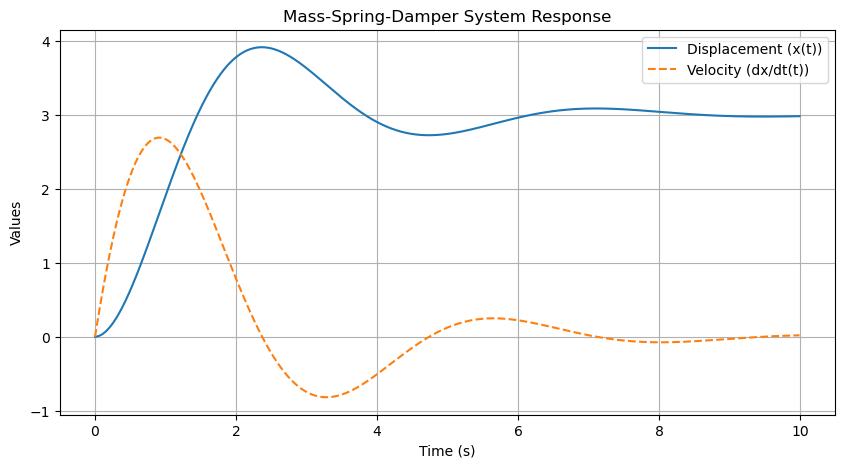

In [4]:
# Plotting the results
plt.figure(figsize=(10, 5))

plt.plot(solution['time'], solution['position'], label="Displacement (x(t))")
plt.plot(solution['time'], solution['velocity'], label="Velocity (dx/dt(t))", linestyle="--")

plt.xlabel("Time (s)")
plt.ylabel("Values")
plt.title("Mass-Spring-Damper System Response")
plt.legend()
plt.grid()

plt.show()